# REMEDIAL

## Nadea Putri Nur Fauzi (20110031)

### Text Classification using RNN

### Import beberapa library yang dibutuhkan

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Open and Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/TUGAS/DL-remedial/train.csv')
data.head()

,jenis,kalimat
0,2,pohon banyak kanan banyak tinggi
1,0,kau ingin kecil
2,1,penyemangatku happy gampang akulah
3,0,di jauh aku tempat kecil langit
4,0,angkasa angkasa ke


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   jenis    300 non-null    int64 
 1   kalimat  300 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [5]:
data['jenis'].nunique()

3

In [6]:
data['jenis'].value_counts()

2    100
0    100
1    100
Name: jenis, dtype: int64

### Split Dataset (Train and Test)

In [7]:
from sklearn.model_selection import train_test_split

Split data dengan perbandingan 75%:25%

In [8]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

In [9]:
train_data.shape,test_data.shape

((225, 2), (75, 2))

Didapatkan 225 baris dengan 2 kolom untuk data train, dan 75 baris dengan 2 kolom untuk data test

### Tokenizer and Padding Sequence

Disini hanya menggunakan 100 kata teratas karena kalau dilihat dari data mentahannya, kata-kata yang unik tersebut tidak lebih dari 100 kata. Jadi hanya membuat tokenisasi untuk 100 kata paling sering muncul saja.

Juga memberikan tanda <OOV> (Out-Of-Vocabulary) pada kata-kata yang tidak termasuk dalam 100 kata teratas tersebut.

Dilakukan juga pengubahan setiap kalimat pada dataset training menjadi sequence berdasarkan token yang sudah dihasilkan oleh objek tokenizer sebelumnya. 

Menambahkan padding pada setiap sequence yang sudah dihasilkan sebelumnya, sehingga setiap sequence memiliki panjang yang sama. panjang sequence yang diinputkan adalah 20 saja karena melihat dari kata yang ada pada kolom kalimat, jika suatu sequence memiliki panjang kurang dari 20, maka padding akan ditambahkan pada akhir sequence. Jika suatu sequence memiliki panjang lebih dari 20, maka bagian awal sequence akan dipotong.

Hal ini diterapkan pada data training dan testing.

In [10]:
tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['kalimat'])

train_sequences = tokenizer.texts_to_sequences(train_data['kalimat'])
train_padded = pad_sequences(train_sequences, maxlen=20, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_data['kalimat'])
test_padded = pad_sequences(test_sequences, maxlen=20, padding='post', truncating='post')

### Modelling using RNN

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100, 16, input_length=20),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Menggunakan layer embedding untuk mengubah sequence yang sudah di-padding menjadi vektor dengan jumlah dimensi yang lebih kecil. Argumen 100 digunakan untuk menentukan jumlah kata yang digunakan sebagai input, 16 digunakan untuk menentukan jumlah dimensi output yang diinginkan untuk vektor embedding, dan input_length=20 digunakan untuk menentukan panjang maksimum sequence yang akan diinputkan ke dalam model.

Layer pooling digunakan untuk menggabungkan vektor-vektor yang dihasilkan oleh layer embedding menjadi sebuah vektor tunggal dengan dimensi yang lebih kecil. Dalam kasus ini, layer pooling menggunakan average pooling, yaitu mengambil rata-rata dari semua vektor embedding yang dihasilkan.

Layer output dense dengan keluaran 3 dan aktifasi softmax karena datanya categorical (0,1,dan 2)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Dicompile menggunakan sparse categorical karena datanya categorical, optimizernya adam untun mempercepat training dan metrics akurasi untuk melihat kebaikan model.

In [13]:
history = model.fit(train_padded, train_data['jenis'], epochs=50, validation_data=(test_padded, test_data['jenis']), batch_size=10)

Epoch 1/50
23/23 [==============================] - 3s 37ms/step - loss: 1.0951 - accuracy: 0.4000 - val_loss: 1.0888 - val_accuracy: 0.5200
Epoch 2/50
23/23 [==============================] - 0s 16ms/step - loss: 1.0007 - accuracy: 0.6356 - val_loss: 0.8122 - val_accuracy: 0.5867
Epoch 3/50
23/23 [==============================] - 0s 16ms/step - loss: 0.5613 - accuracy: 0.6933 - val_loss: 0.5781 - val_accuracy: 0.6000
Epoch 4/50
23/23 [==============================] - 0s 16ms/step - loss: 0.4119 - accuracy: 0.6933 - val_loss: 0.4327 - val_accuracy: 0.6133
Epoch 5/50
23/23 [==============================] - 0s 14ms/step - loss: 0.2471 - accuracy: 0.9289 - val_loss: 0.1947 - val_accuracy: 0.9867
Epoch 6/50
23/23 [==============================] - 0s 16ms/step - loss: 0.0837 - accuracy: 0.9956 - val_loss: 0.0723 - val_accuracy: 0.9867
Epoch 7/50
23/23 [==============================] - 0s 12ms/step - loss: 0.0315 - accuracy: 0.9956 - val_loss: 0.0631 - val_accuracy: 0.9867
Epoch 8/50
23

### Plot Accuracy and Loss

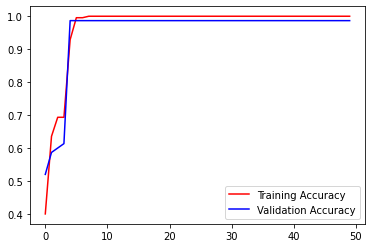

In [14]:
import matplotlib.pyplot as plt

def acc_plot(history):
  plt.plot(history.history['accuracy'],'r', label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],'b', label='Validation Accuracy')
  plt.legend()

acc_plot(history)

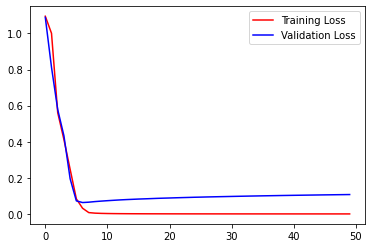

In [15]:
def loss_plot(history):
  plt.plot(history.history['loss'],'r', label='Training Loss')
  plt.plot(history.history['val_loss'],'b', label='Validation Loss')
  plt.legend()

loss_plot(history)

### Save Model

In [16]:
model.save('RNNmodel1.h5')

### Predict Soal.csv

In [17]:
soal = pd.read_csv('/content/drive/MyDrive/TUGAS/DL-remedial/soal.csv')
soal.head()

,kalimat
0,queen sapi tujuan gampang penyemangatku queen
1,ke jauh ingin jauh amat aku
2,cemara cemara tinggi
3,bikin kasar penyemangatku puyuh kuat sabar
4,kecil ingin terbang


In [18]:
sequences = tokenizer.texts_to_sequences(soal['kalimat'])
padded = pad_sequences(sequences, maxlen=20, padding='post', truncating='post')

In [19]:
predictions = model.predict(padded)
labels = ['0', '1', '2']
predicted_labels = [labels[prediction.argmax()] for prediction in predictions] #argmax biar bilangan bulat

soal['kelas'] = predicted_labels

print(soal)

10/10 [==============================] - 0s 3ms/step
                                            kalimat kelas
0    queen sapi tujuan gampang penyemangatku queen      1
1                      ke jauh ingin jauh amat aku      0
2                             cemara cemara tinggi      2
3       bikin kasar penyemangatku puyuh kuat sabar      1
4                              kecil ingin terbang      0
..                                              ...   ...
295                          makan kasar mengingat      1
296   tinggi kiri pohon pohon puncak cemara sekali      2
297                                  berada dan ke      0
298                      ngguyu ku ayam aku akulah      1
299               sekali sekali sekali kanan pohon      2

[300 rows x 2 columns]


Hasil Predict

In [20]:
soal['kelas']

0      1
1      0
2      2
3      1
4      0
      ..
295    1
296    2
297    0
298    1
299    2
Name: kelas, Length: 300, dtype: object

In [21]:
jwb = soal['kelas'].values

In [22]:
jwb

array(['1', '0', '2', '1', '0', '2', '2', '0', '1', '0', '1', '2', '0',
       '2', '1', '1', '1', '1', '1', '2', '1', '1', '2', '2', '2', '2',
       '0', '2', '2', '2', '0', '1', '2', '1', '1', '2', '2', '1', '2',
       '0', '1', '0', '1', '2', '1', '1', '2', '2', '0', '0', '0', '2',
       '2', '2', '0', '0', '2', '2', '2', '0', '2', '1', '1', '1', '2',
       '2', '2', '0', '0', '2', '0', '1', '1', '1', '0', '2', '0', '0',
       '0', '1', '0', '2', '0', '2', '1', '1', '0', '0', '1', '2', '1',
       '1', '2', '2', '2', '0', '1', '1', '0', '1', '0', '2', '2', '1',
       '1', '2', '0', '2', '2', '2', '0', '1', '2', '0', '1', '1', '1',
       '0', '2', '2', '0', '1', '1', '0', '1', '1', '1', '2', '1', '2',
       '0', '0', '2', '1', '0', '0', '2', '0', '1', '0', '2', '2', '0',
       '0', '0', '2', '0', '0', '2', '1', '0', '1', '2', '2', '1', '2',
       '1', '2', '1', '2', '1', '0', '0', '2', '2', '1', '2', '2', '0',
       '1', '0', '0', '0', '1', '2', '2', '2', '1', '2', '1', '0

### Hasil Predict Fix

In [23]:
jwbFix = soal['kelas'].values.astype(int)

In [24]:
jwbFix

array([1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2,
       2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0,
       1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2,
       2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0,
       0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2])

In [25]:
np.savetxt('20110031.csv', jwbFix, delimiter=',', fmt='%d')